In [9]:
import os
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Test model on custom pictures

### Collect images for prediction

In [5]:
PATH = os.getcwd()
test_image_dir = os.path.join(PATH, 'data', 'test')

BATCH_SIZE = 10
IMG_SIZE = (160, 160)

custom_dataset = image_dataset_from_directory(test_image_dir,
                                             shuffle=False,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 8 files belonging to 2 classes.


### Initialize model

In [7]:
model = tf.keras.models.load_model('model')

### Make predictions

In [8]:
#Retrieve a batch of images from the test set
image_batch, label_batch = custom_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

Predictions:
 [0 0 0 0 0 0 1 0]
Labels:
 [0 0 0 0 1 1 1 1]


### Visualise predictions

IndexError: index 8 is out of bounds for axis 0 with size 8

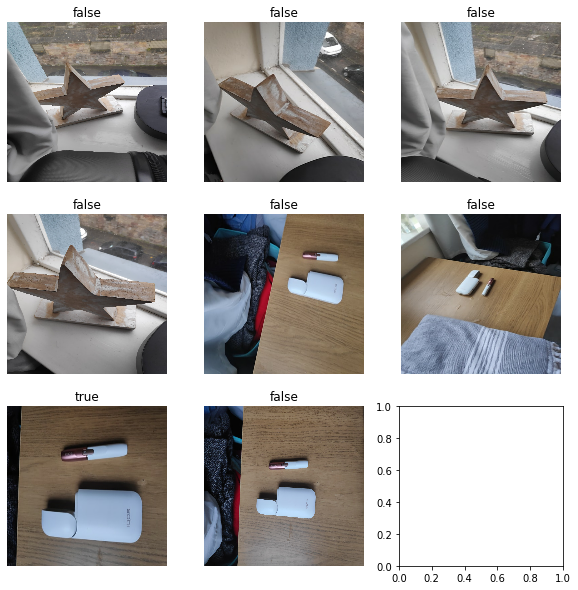

In [11]:
class_names = custom_dataset.class_names
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")